## Сделаем базовый вариант - API для GitHub

Реализуйте следующие функции:

1) get_user_info(username) - возвращает словарь с информацией о юзере. Ключи: имя (которое НЕ никнейм), организация, местоположение, число подписчиков, число репозиториев.

2) get_user_repositories(username) - возвращает список публичных репозиториев пользователя в виде списка словарей. Ключи: юзер, имя репозитория, язык.

3) list_repository_contents(username, repository, repository_path) - возвращает список файлов и папок в репозитории repository пользователя username по пути repository_path. По сути это аналогично использованию "ls repository_path" локально, мы просто выводим список файлов по указанному пути.

4) download_file(username, repository, remote_file_path, local_file_path) - скачивание файла, который имеет путь remote_file_path в репозитории и сохранение локально по пути local_file_path. При попытке скачать папку можно бросить исключение или же скачать всю папку.

In [1]:
import requests
from bs4 import BeautifulSoup
import re

### Первая функция
Возвращает словарь с информацией о юзере. Ключи: имя (которое НЕ никнейм), организация, местоположение, число подписчиков, число репозиториев

In [115]:
def get_user_info(username):
    url = 'https://github.com/' + username
    user_dict = {'Name':'Nothing', 
                 'Organization':'Nothing',
                 'Number of repositories':'Nothing',
                 'Number of followers':'Nothing',
                'Location' : 'Nothing'}
    resp = requests.get(url)
    soup = BeautifulSoup(resp.content)
    action_dict = {'Name': (lambda soup: soup.find('span', itemprop = 'name').text.strip()), 
                 'Organization':(lambda soup: soup.find('span', class_ = "p-org").text),
                 'Number of repositories':(lambda soup: soup.find_all('span', class_ = 'Counter')[0].text),
                 'Number of followers':(lambda soup: soup.find('span', class_ = "text-bold color-fg-default").text),
                'Location' : (lambda soup: soup.find('span', class_ = "p-label").text)}
    for name in user_dict:
        try:
            user_dict[name] = action_dict[name](soup)
        except:
            pass
    return user_dict
        

#### Демонстрация

In [116]:
slovar = get_user_info('krglkvrmn')
print(slovar)

{'Name': 'Roman Kruglikov', 'Organization': 'Nothing', 'Number of repositories': '11', 'Number of followers': '1', 'Location': 'Moscow'}


In [117]:
slovar = get_user_info('immbiochem')
print(slovar)

{'Name': 'Semyon Kupriyanov', 'Organization': 'SUSMU', 'Number of repositories': '4', 'Number of followers': 'Nothing', 'Location': 'Nothing'}


### Вторая функция
Возвращает список публичных репозиториев пользователя в виде списка словарей. Ключи: юзер, имя репозитория, язык

In [111]:
def get_user_repositories(username):
    url = 'https://github.com/'+username+'?tab=repositories'
    resp = requests.get(url)
    soup = BeautifulSoup(resp.content)
    rep = soup.find_all('li', class_=re.compile('col-+'))
    reps_list = []
    for i in range(len(rep)):
        if rep[i].find('span', class_=re.compile('Label')).text == 'Public':
            block = {'User': soup.find('span', itemprop='name').text.strip()}
            try:
                block['Name'] = rep[i].find('a', itemprop="name codeRepository").text.strip()
            except:
                block['Name'] = 'None'
            try:
                block['Language'] = rep[i].find(['ul', 'span'], itemprop=re.compile('pro+')).text
            except:
                block['Language'] = 'None'
            reps_list.append(block)
    return reps_list

#### Демонстрация

In [113]:
print(get_user_repositories('krglkvrmn'))

[{'User': 'Roman Kruglikov', 'Name': 'FlowSOM', 'Language': 'Python'}, {'User': 'Roman Kruglikov', 'Name': 'Clipboard_translater', 'Language': 'Python'}, {'User': 'Roman Kruglikov', 'Name': 'Virtual_environment_research', 'Language': 'Python'}, {'User': 'Roman Kruglikov', 'Name': 'BI_2021_Python', 'Language': 'Python'}, {'User': 'Roman Kruglikov', 'Name': 'IB_Music_project', 'Language': 'Jupyter Notebook'}, {'User': 'Roman Kruglikov', 'Name': 'Asteroids_pygame_tutorial', 'Language': 'Python'}, {'User': 'Roman Kruglikov', 'Name': 'BI_2021_spring_project', 'Language': 'Jupyter Notebook'}, {'User': 'Roman Kruglikov', 'Name': 'SeqTools', 'Language': 'Python'}, {'User': 'Roman Kruglikov', 'Name': 'BI_Statistics_projects', 'Language': 'None'}, {'User': 'Roman Kruglikov', 'Name': 'BI_Python', 'Language': 'Jupyter Notebook'}, {'User': 'Roman Kruglikov', 'Name': 'MAG_gi_plasmid_analysis', 'Language': 'Jupyter Notebook'}]


In [114]:
print(get_user_repositories('immbiochem'))

[{'User': 'Semyon Kupriyanov', 'Name': 'BI_ML_2021', 'Language': 'None'}, {'User': 'Semyon Kupriyanov', 'Name': 'BI_2021_Python', 'Language': 'Jupyter Notebook'}, {'User': 'Semyon Kupriyanov', 'Name': 'BI_Stat_2021', 'Language': 'HTML'}, {'User': 'Semyon Kupriyanov', 'Name': 'bf_course', 'Language': 'Jupyter Notebook'}]


### Третья функция
Возвращает список файлов и папок в репозитории repository пользователя username по пути repository_path. По сути это аналогично использованию "ls repository_path" локально, мы просто выводим список файлов по указанному пути

In [144]:
def list_repository_contents(username, repository_path):
    url = 'https://github.com/'+username+repository_path
    resp = requests.get(url)
    soup = BeautifulSoup(resp.content)
    black_box = soup.find('div', role='grid').find_all('div', role='row')
    repository_content = list()
    for tag in black_box:
        try:
            repository_content.append(tag.find('a', class_=re.compile('js+')).text)
        except:
            pass
    return repository_content

##### Я не совсем понял, зачем нужно так много аргументов, если в путь до репозитория входит его имя, поэтому указал два аргумента, если нужно, перепишу

#### Демонстрация

In [145]:
print(list_repository_contents('krglkvrmn', '/Clipboard_translater'))

['images', '.gitignore', 'README.md', 'dict_manager.py', 'main.py', 'requirements.txt', 'translater.py']


In [146]:
print(list_repository_contents('immbiochem', '/BI_2021_Python'))

['.github/workflows', 'UNIX_like_programms', 'New fastq-filtrator.py', 'RANDOM.ipynb', 'README.md', 'SEQ-PROG.py', 'functional.py', 'numpy_challenge.py', 'units_converter.py']


### Четвертая функция
Скачивание файла, который имеет путь remote_file_path в репозитории и сохранение локально по пути local_file_path. При попытке скачать папку можно бросить исключение или же скачать всю папку

In [250]:
def download_file(username, repository, remote_file_path, local_file_path):
    url = 'https://raw.githubusercontent.com/'+username+'/'+repository+remote_file_path
    resp = requests.get(url)
    filename = url.split('/')[-1]
    if resp.ok:
        with open(local_file_path+filename, 'wb') as file:
            file.write(resp.content)
    else:
        raise ValueError('Check your input information')

#### Демонстрация

In [251]:
download_file('immbiochem', 'BI_Stat_2021', '/main/olimpic_games_branch/data_folder/athlete_events00.csv', r'C:\Users\pfft\OneDrive\Рабочий стол\БИ\BI_2021_Python\api\\')

In [252]:
download_file('immbiochem', 'bf_course', '/master/14.pandas/train.csv', r'C:\Users\pfft\OneDrive\Рабочий стол\БИ\BI_2021_Python\api\\')

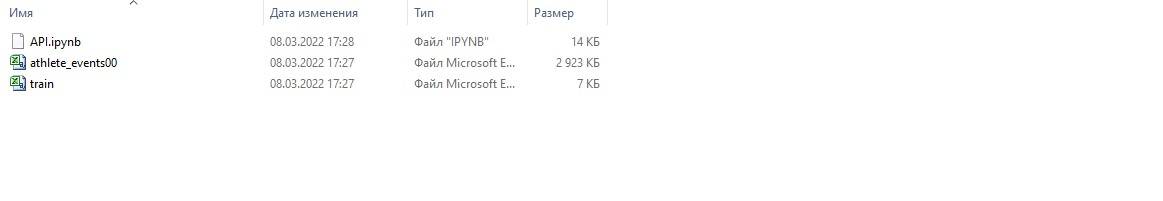